# Calculating optical depths along lines of sight in HR

Text(0, 0.5, 'Optical Depth')

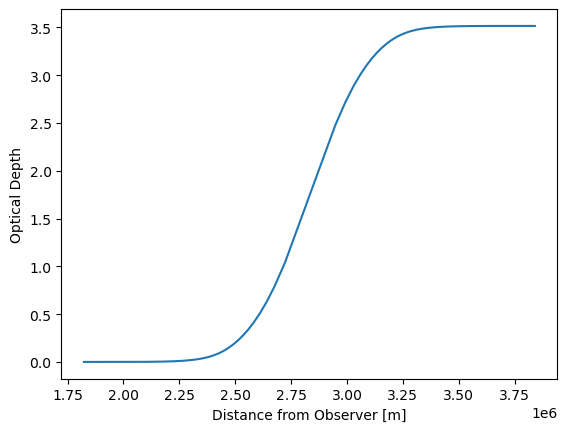

In [1]:
import sasktran as sk
import matplotlib.pyplot as plt
import numpy as np
from sasktran.geometry import VerticalImage
import time

tanalts_km = np.arange(20, 50, 1)

# First recreate our geometry and atmosphere classes
geometry = VerticalImage()
geometry.from_sza_saa(sza=60, saa=60, lat=0, lon=0, tanalts_km=tanalts_km, mjd=54372, locallook=0,
                      satalt_km=600, refalt_km=20)

atmosphere = sk.Atmosphere()

atmosphere['ozone'] = sk.Species(sk.O3OSIRISRes(), sk.Labow())
atmosphere['air'] = sk.Species(sk.Rayleigh(), sk.MSIS90())

# And now make the engine
engine = sk.EngineHR(geometry=geometry, atmosphere=atmosphere)
wavel = [340, 600]
engine.wavelengths = wavel

cell = engine.cell_optical_depths()

plt.plot(cell[0][0]['cell_start_distance'], cell[0][0]['cell_start_optical_depth'])
plt.xlabel('Distance from Observer [m]')
plt.ylabel('Optical Depth')